# **Data Cleaning**

## Objectives

* Import the Dataset
* Analyze the necessary steps for data cleaning

## Inputs

* The dataset is located at: outputs/datasets/collection in the root level directory

## Outputs

* Cleaned dataset, ready for correlation studies in order to answer business requirements



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Fabrizio-Project-Five/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Fabrizio-Project-Five'

# Analysis of the dataset

In this section we will take a look at all the missing data in the dataset

In [4]:
import pandas as pd
df = pd.read_csv('inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

Now the features with missing values are:
* 2ndFlrSF
* BedroomAbvGr
* BsmtFinType1
* EnclosedPorch
* GarageFinish
* GarageYrBlt
* LotFrontage
* MasVnrArea
* WoodDeckSF

 Of these features only 2 are categorical (BsmtFinType1, GarageFinish). In order to transform these two features and the other categorical features into numbers we will have to use some feature engineering techniques. These steps will be highlighted later in another notebook since ML algorithms and correlation techniques need numerical data in order to work. 

 Now we will look at our missing values from features with numerical data type. 

- 2ndFlrSF stands for the square feet of surface found at the 2nd floor. Given the fact that this dataset is all from houses in the same area we can fill the missing data with a mean value found for that column.
- BedroomAbvGr stands for bedroom above grade and it's a score that spans 0 to 8. Here too we can substitute the missing values with a mean score in order to keep the distribution unaffected.
- Enclosed Porch is a square feet range of surface area. Since many of the values are 0 and only few have a square feet value above 0 we can infer that those with 0 are houses with no enclosed porch. We will fill the missing values with 0.
- GarageYrBlt stands for the year during which the house garage has been built. In this case the missing data is present due to the fact that the house in question has no garage. It would be inprudent to fill the missing values with the mean of the year or other imputation methods. In this case we will drop the rows with the missing data.
- Lot frontage stands for the amount of linear feet of the property in contact with the road. For all the missing values we will impute the mean value of the column.
- MasVnrArea. This column refers to the masonry veneer area of the prorperty. Since the vast majority of data points for this feature are 0 we will fill the few (just 8 data points) empty slots with 0.
- WoodDeckSF. This feature refers to the surface area of the wooden deck in square feet. The number of missing data in this feature is greater than in any other but we can safely assume that this is due to a lack of a wooden deck in the house taken into consideration. For this column we can simply impute 0 for all the missing values.

---

# Data cleaning steps

In this section we will apply the cleaning steps as highlighted in the previous paragraph.
A quick summary of the steps we'll take:
- 2ndFlrSF: impute mean value for the missing data
- BedroomAbvGr: impute mean value for the missing data
- Enclosed Porch: impute value of 0 for the missing data
- GarageYrBlt: drop the rows with missing data
- LotFrontage: impute mean value for the missing data
- MasVnrArea: impute value of 0 for the missing data
- WoodDeckSF: impute value of 0 for the missing data

In [5]:
# First we drop the rows with missing data from 'GarageYrBlt'
df = df.dropna(subset='GarageYrBlt')

"""
This function will iterate over all the numerical features with missing variables and impute the missing data according 
to what we specified in the previous cells
"""
num_vars_with_miss = ['2ndFlrSF', 'BedroomAbvGr', 'EnclosedPorch', 'LotFrontage', 'MasVnrArea', 'WoodDeckSF']
def impute_missing_values(vars_to_impute, df):
    for col in vars_to_impute:
        if col in ['EnclosedPorch', 'MasVnrArea', 'WoodDeckSF']:
            df[col] = df[col].fillna(0)
        else:
            if col in ['2ndFlrSF', 'BedroomAbvGr', 'LotFrontage',]:
                df[col] = df[col].fillna(df[col].mean())
    return df
            
impute_missing_values(num_vars_with_miss, df)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.000000,3.000000,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.000000,3.000000,Gd,978,ALQ,284,0.0,460,RFn,...,80.0,0.0,0,8,6,1262,0.0,1976,1976,181500
2,920,866.000000,3.000000,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,0.0,2001,2002,223500
3,961,354.706697,2.866719,No,216,ALQ,540,0.0,642,Unf,...,60.0,0.0,35,5,7,756,0.0,1915,1970,140000
4,1145,354.706697,4.000000,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,0.0,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694.000000,3.000000,No,0,Unf,953,0.0,460,RFn,...,62.0,0.0,40,5,6,953,0.0,1999,2000,175000
1456,2073,0.000000,2.866719,No,790,ALQ,589,0.0,500,Unf,...,85.0,119.0,0,6,6,1542,0.0,1978,1988,210000
1457,1188,1152.000000,4.000000,No,275,GLQ,877,0.0,252,RFn,...,66.0,0.0,60,9,7,1152,0.0,1941,2006,266500
1458,1078,0.000000,2.000000,Mn,49,NaN,0,112.0,240,Unf,...,68.0,0.0,0,6,5,1078,0.0,1950,1996,142125


Now that we have filled the missing values for the numerical features we can check the dataset to ascertain the current status after the changes we made

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   int64  
 1   2ndFlrSF       1379 non-null   float64
 2   BedroomAbvGr   1379 non-null   float64
 3   BsmtExposure   1379 non-null   object 
 4   BsmtFinSF1     1379 non-null   int64  
 5   BsmtFinType1   1275 non-null   object 
 6   BsmtUnfSF      1379 non-null   int64  
 7   EnclosedPorch  1379 non-null   float64
 8   GarageArea     1379 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1379 non-null   int64  
 12  KitchenQual    1379 non-null   object 
 13  LotArea        1379 non-null   int64  
 14  LotFrontage    1379 non-null   float64
 15  MasVnrArea     1379 non-null   float64
 16  OpenPorchSF    1379 non-null   int64  
 17  OverallCond    1379 non-null   int64  
 18  OverallQ

Now let's tackle the object features with missing data. As we know from our previous analysis these features are: Garage Finish and BsmtFinType1

-  Garage Finish: This feature collects data on the status of the garage which can be:
    - Finished
    - Rough finished
    - Unfinished
    - None
   
For the missing data here we can impute 'Unfinished' because where None is present we see that the feature 'Garage Area' also shows 0, confirming the absence of a garage.

---
- BsmtFinType1: This feature referes to the state of the basement and it has the following possible values:
    - Good Living Quarters
    - Average Living Quarters
    - Below Average Living Quarters
    - Average Rec Room
    - Low Quality
    - Unfinished
    - None
     
For the missing data we can fill with 'Unfinished' as well since the missing data corresponds with either 0 or a numerical value and 'Unfinished' is also the most common value fo this feature.

In [7]:
categorical_cols_with_missing_data = ['GarageFinish', 'BsmtFinType1']

for col in categorical_cols_with_missing_data:
    df[col] = df[col].fillna(value='Unf')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1379 non-null   int64  
 1   2ndFlrSF       1379 non-null   float64
 2   BedroomAbvGr   1379 non-null   float64
 3   BsmtExposure   1379 non-null   object 
 4   BsmtFinSF1     1379 non-null   int64  
 5   BsmtFinType1   1379 non-null   object 
 6   BsmtUnfSF      1379 non-null   int64  
 7   EnclosedPorch  1379 non-null   float64
 8   GarageArea     1379 non-null   int64  
 9   GarageFinish   1379 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1379 non-null   int64  
 12  KitchenQual    1379 non-null   object 
 13  LotArea        1379 non-null   int64  
 14  LotFrontage    1379 non-null   float64
 15  MasVnrArea     1379 non-null   float64
 16  OpenPorchSF    1379 non-null   int64  
 17  OverallCond    1379 non-null   int64  
 18  OverallQ

Now that we have a clean dataset we can start with our feature engineering process in order to obtain only numerical values and
be able to start our correlation study. The study will allow us to answer our first business requirements.

In [8]:
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        categorical_cols.append(col)
categorical_cols

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

In [9]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=categorical_cols, drop_last=False)
df_ohe = encoder.fit_transform(df)
df_ohe.shape

(1379, 39)

As we can notice now the format of our dataset changed from 24 columns to 39 since the object features were encoded.
Now we can run our correlation study to verify which features are more correlated with 'SalePrice'.
We will try the correlation with both 'Spearman' and 'Pearson' method.

In [15]:
df_ohe_corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)

df_ohe_corr_spearman

OverallQual         0.808511
GrLivArea           0.730148
YearBuilt           0.646068
GarageArea          0.612761
KitchenQual_TA     -0.599837
GarageYrBlt         0.593788
TotalBsmtSF         0.587366
YearRemodAdd        0.578389
1stFlrSF            0.560320
GarageFinish_Unf   -0.501228
Name: SalePrice, dtype: float64

In the above cell we can note the ten most correlated features with the variable 'SalePrice' using the Spearman method. Now let's do the same for the Pearson method and see if we get different values

In [11]:
df_ohe_corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
df_ohe_corr_pearson

OverallQual       0.787228
GrLivArea         0.708172
GarageArea        0.608405
TotalBsmtSF       0.603583
1stFlrSF          0.594935
KitchenQual_TA   -0.526715
KitchenQual_Ex    0.513985
YearBuilt         0.507584
YearRemodAdd      0.505434
GarageYrBlt       0.486362
Name: SalePrice, dtype: float64

It is clear that we have stronger correlation levels with the 'Spearman' method. Now that we know our most correlated features we can say that:

- The price of a house increases with the increase of Overall Quality
- The price of a house increases with the increase of Ground Living Area (in square feet) when above grade
- The price of a house increases when the year of construction is more recent
- The price of a house increases with the increase of Garage Area
- The price of a house increases when the Kitchen Quality is NOT assesed as Typical/Average
- The price of a house increases when the year of construction of the garage is more recent
- The price of a house increases when the basement surface (measured in square feet) increases
- The price of a house increases when the year of remodelling is more recent
- The price of a house increases when the surface area of the 1st floor (measured in square feet) increases
- The price of a house increases when the state of the garage is NOT unfinished

In [12]:
df_ohe.filter(df_ohe_corr_spearman.index) 

,OverallQual,GrLivArea,YearBuilt,GarageArea,KitchenQual_TA,GarageYrBlt,TotalBsmtSF,YearRemodAdd,1stFlrSF,GarageFinish_Unf
0,7,1710,2003,548,0,2003.0,856,2003,856,0
1,6,1262,1976,460,1,1976.0,1262,1976,1262,0
2,7,1786,2001,608,0,2001.0,920,2002,920,0
3,7,1717,1915,642,0,1998.0,756,1970,961,1
4,8,2198,2000,836,0,2000.0,1145,2000,1145,0
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,1999,460,1,1999.0,953,2000,953,0
1456,6,2073,1978,500,1,1978.0,1542,1988,2073,1
1457,7,2340,1941,252,0,1941.0,1152,2006,1188,0
1458,5,1078,1950,240,0,1950.0,1078,1996,1078,1


In order to fully answer the first business requirement (which was information on correlation levels with our target variable 'SalePrice' and data visualization for these levels) we need to display some plots that will help us understand this correlation significance on a visual level

---

Heat map as a first plot will help us significantly in visualize the correlation levels.

In [27]:
df_spearman_corr = df_ohe.corr(method='spearman')
df_spearman_corr

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,...,BsmtFinType1_BLQ,BsmtFinType1_None,BsmtFinType1_LwQ,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_Fin,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
1stFlrSF,1.000000,-0.298626,0.105040,0.322573,0.219311,-0.003439,0.476981,0.230299,0.472878,0.426981,...,-0.041504,0.015094,-0.004049,0.107603,-0.226592,0.157017,0.142953,-0.264594,0.284958,-0.088170
2ndFlrSF,-0.298626,1.000000,0.442959,-0.187688,0.044673,0.038003,0.078121,0.067692,0.619475,0.113809,...,-0.077236,-0.060177,-0.004684,0.007939,-0.105338,0.117355,0.149831,-0.160736,0.028415,-0.007115
BedroomAbvGr,0.105040,0.442959,1.000000,-0.078483,0.118376,0.018314,0.101068,-0.046653,0.489765,0.301656,...,-0.004095,-0.001562,-0.007457,0.017425,-0.037399,0.026269,0.027848,-0.008468,-0.012642,-0.047940
BsmtFinSF1,0.322573,-0.187688,-0.078483,1.000000,-0.581881,-0.020377,0.224765,0.078935,0.052562,0.161062,...,0.110049,-0.165101,0.002456,0.044643,-0.134456,0.113418,0.009115,-0.067611,0.160150,-0.090616
BsmtUnfSF,0.219311,0.044673,0.118376,-0.581881,1.000000,-0.006349,0.111046,0.192027,0.241002,0.067678,...,-0.141728,-0.217821,-0.093715,0.060404,-0.090764,0.044655,0.150468,-0.198179,0.084309,0.023797
EnclosedPorch,-0.003439,0.038003,0.018314,-0.020377,-0.006349,1.000000,-0.007424,-0.076120,0.023801,0.017401,...,0.009230,-0.015180,0.037687,0.007328,0.044248,-0.060537,-0.002172,-0.004414,-0.005138,0.035166
GarageArea,0.476981,0.078121,0.101068,0.224765,0.111046,-0.007424,1.000000,0.591889,0.453954,0.343018,...,-0.155653,-0.032560,-0.103667,0.190739,-0.325047,0.186889,0.280592,-0.392691,0.282730,-0.113811
GarageYrBlt,0.230299,0.067692,-0.046653,0.078935,0.192027,-0.076120,0.591889,1.000000,0.281306,0.041796,...,-0.233123,-0.081662,-0.158455,0.203039,-0.456894,0.331287,0.447302,-0.538312,0.268808,-0.159259
GrLivArea,0.472878,0.619475,0.489765,0.052562,0.241002,0.023801,0.453954,0.281306,1.000000,0.444442,...,-0.124305,-0.049385,-0.008931,0.097635,-0.298396,0.253224,0.269388,-0.382958,0.264560,-0.073014
LotArea,0.426981,0.113809,0.301656,0.161062,0.067678,0.017401,0.343018,0.041796,0.444442,1.000000,...,0.036534,-0.017729,-0.028692,0.061009,-0.167338,0.135412,0.009242,-0.097756,0.184874,-0.024433


<AxesSubplot:>

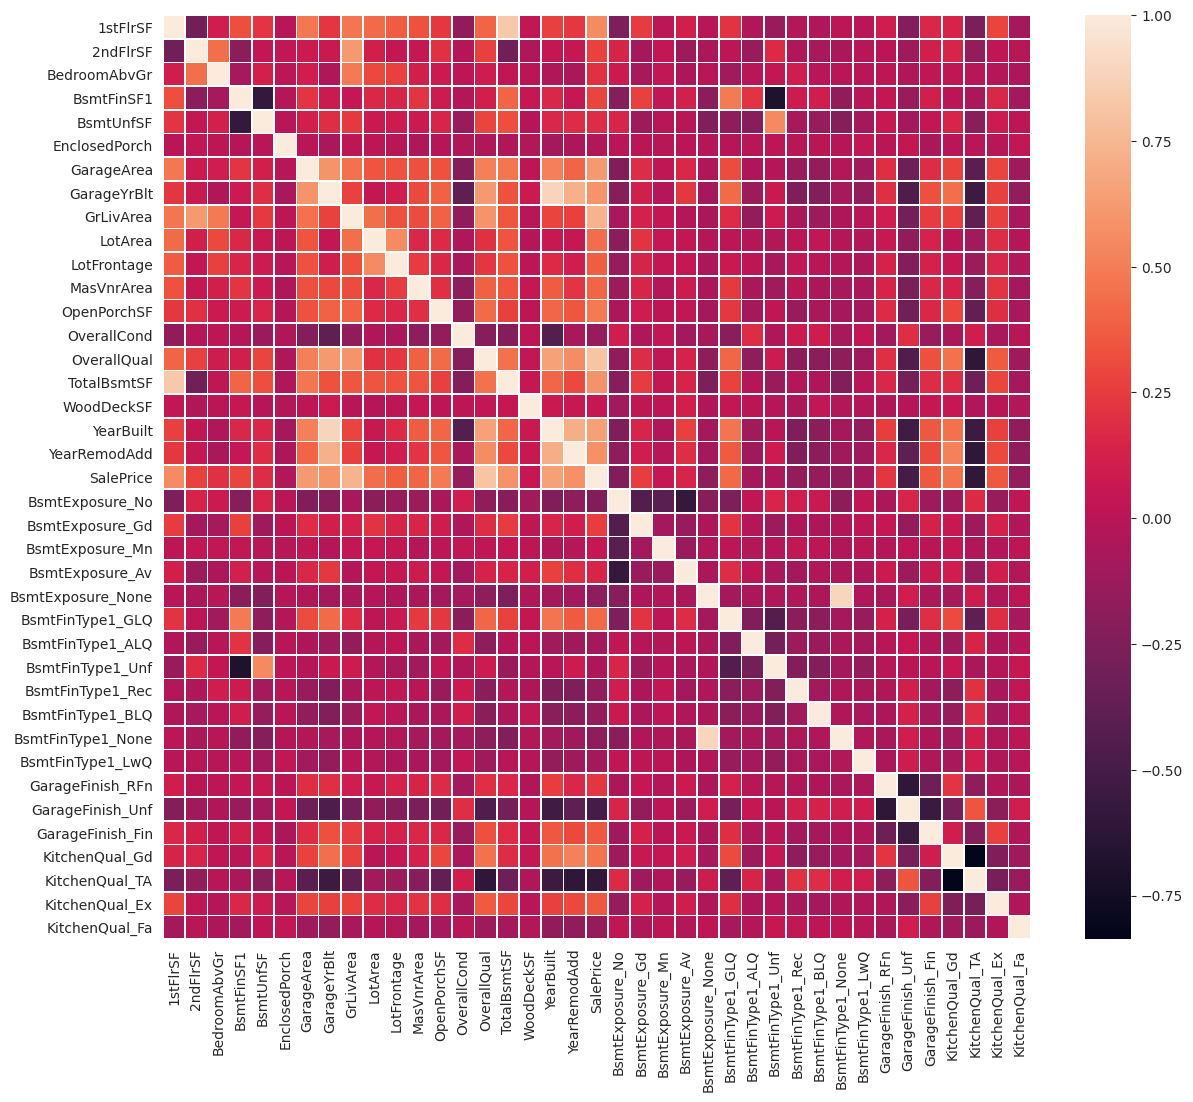

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(corr, dtype=bool)) # code taken from 
sns.heatmap(df_spearman_corr,linewidths=.5)

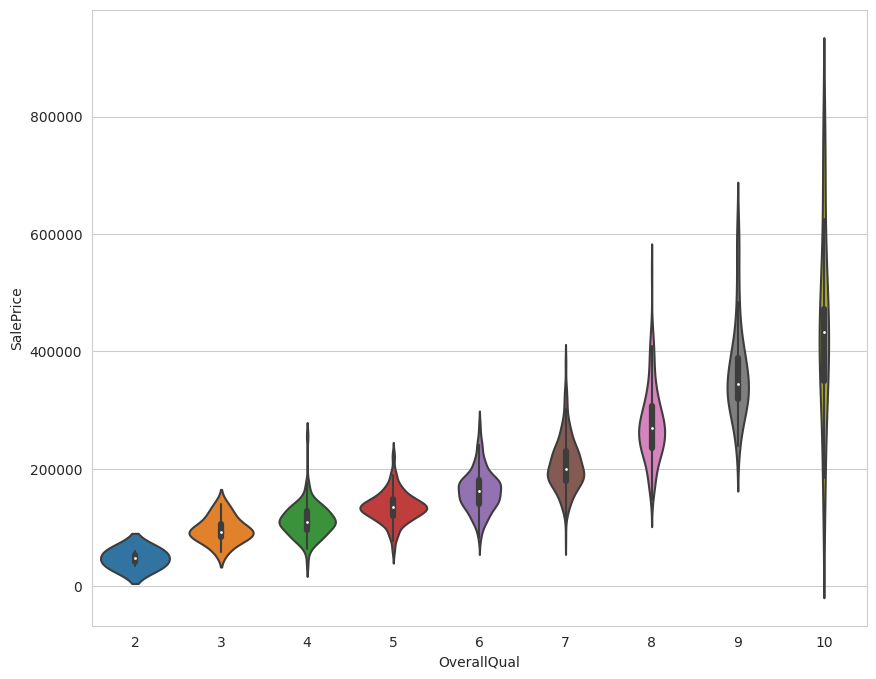

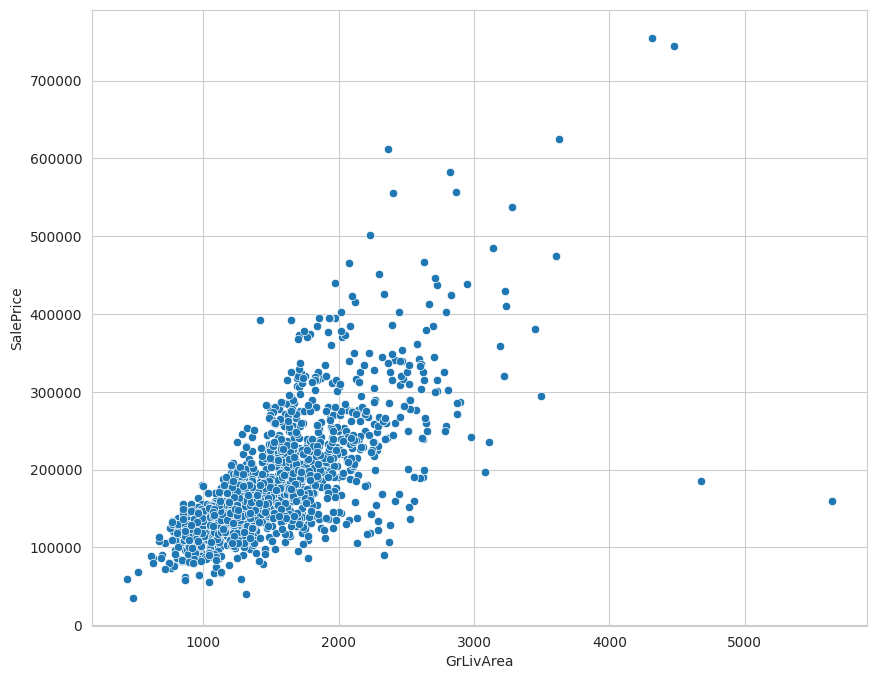

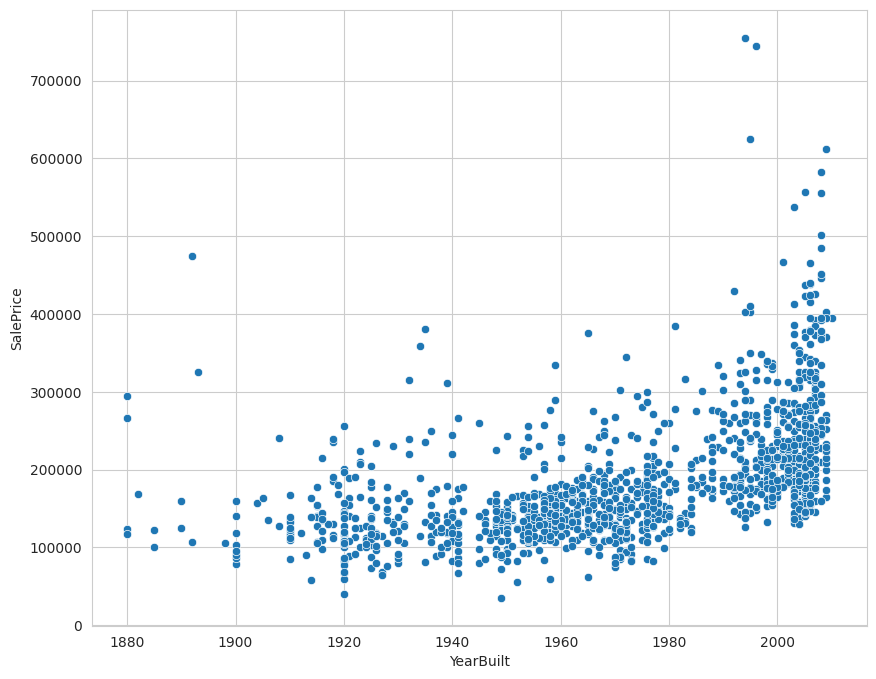

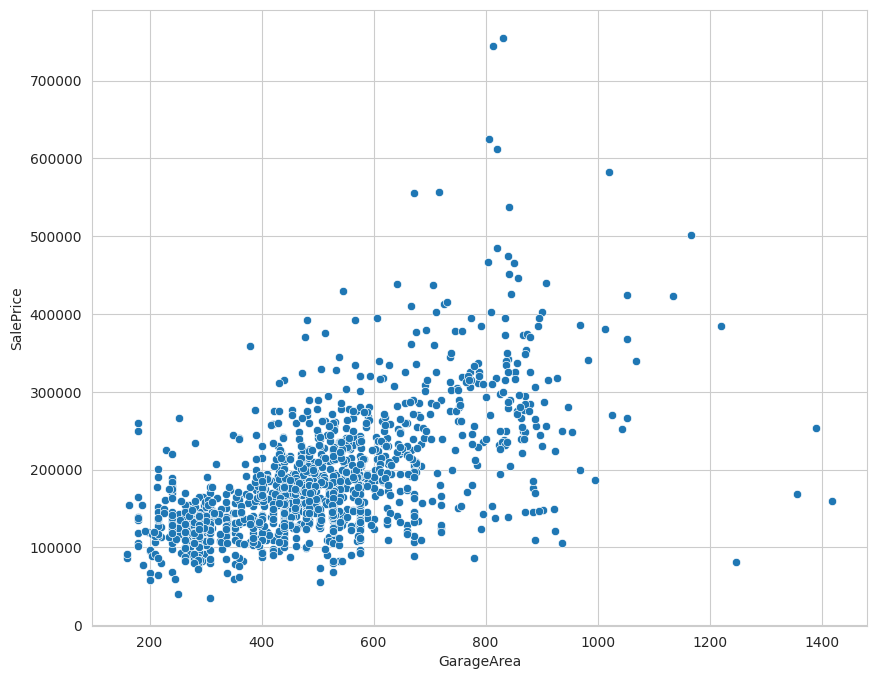

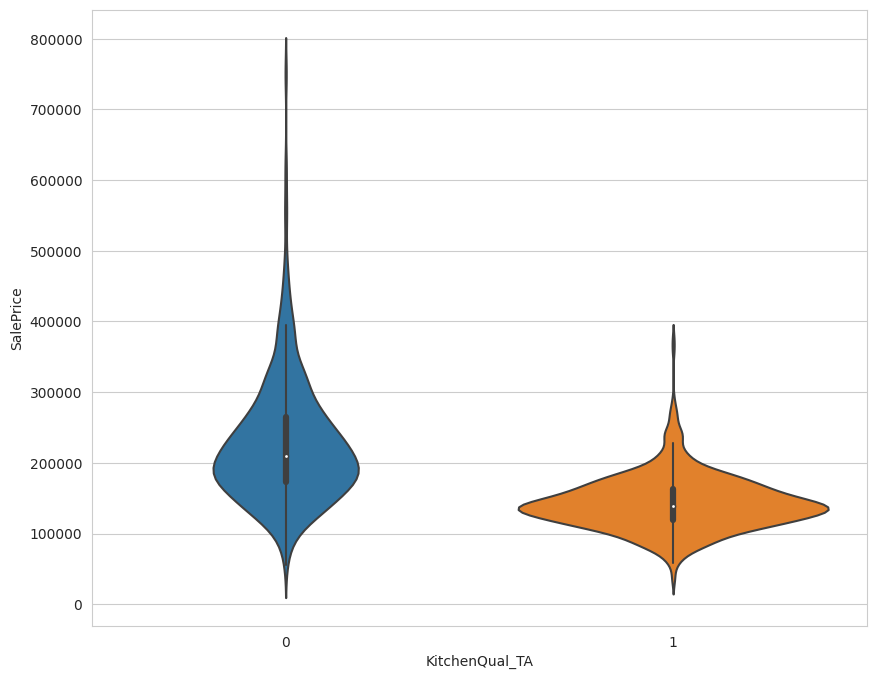

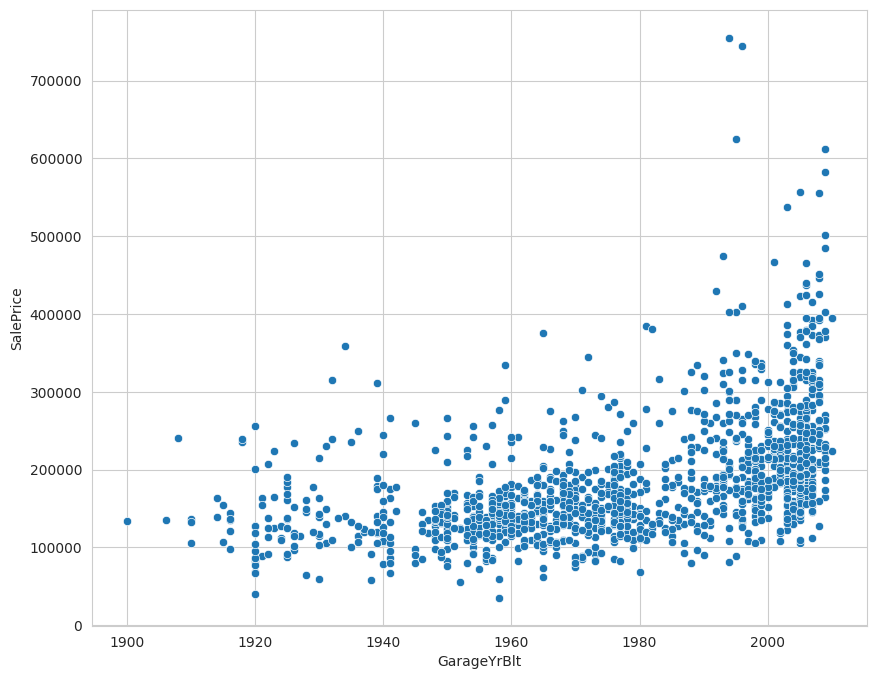

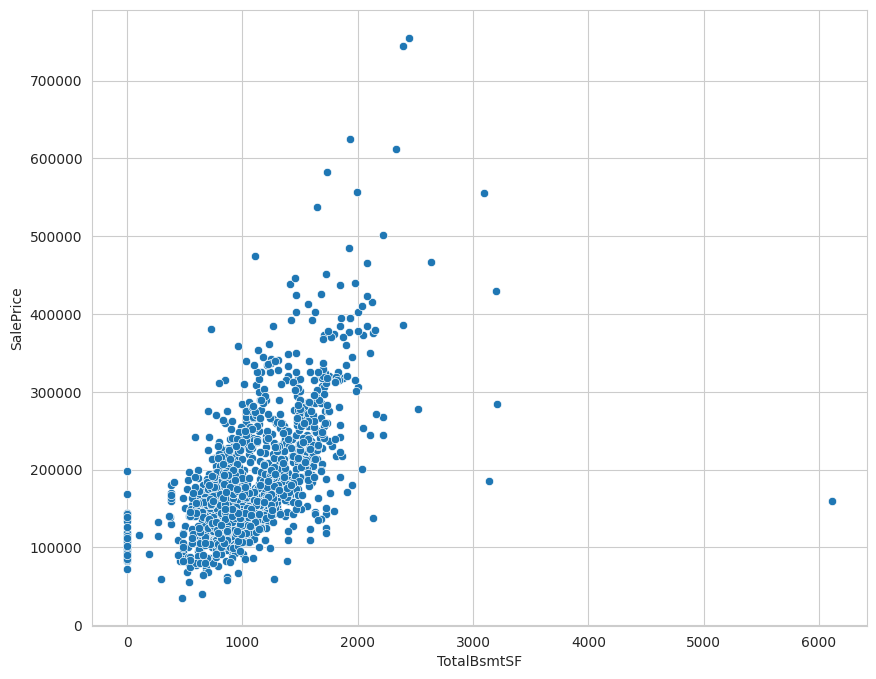

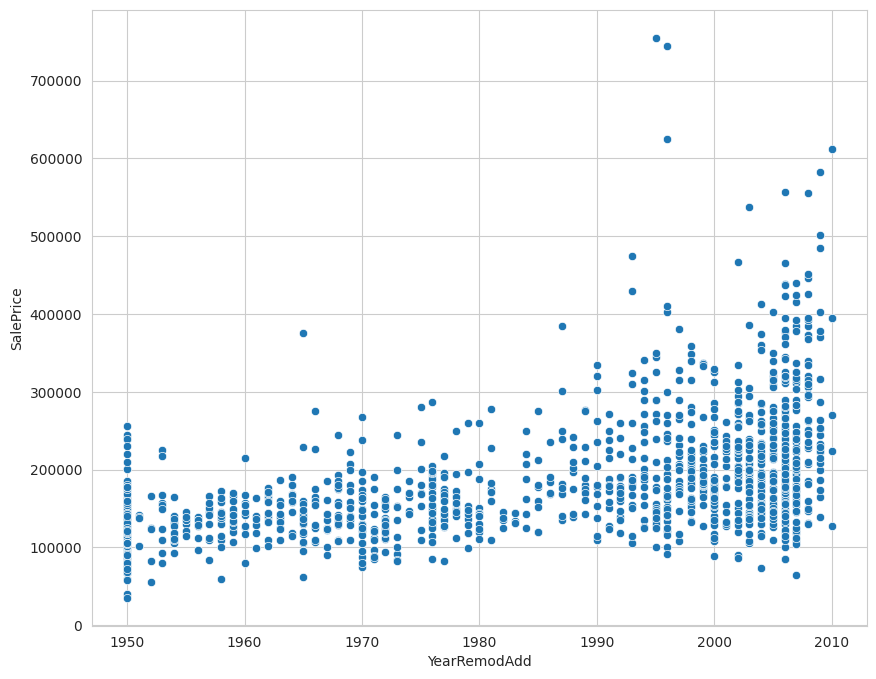

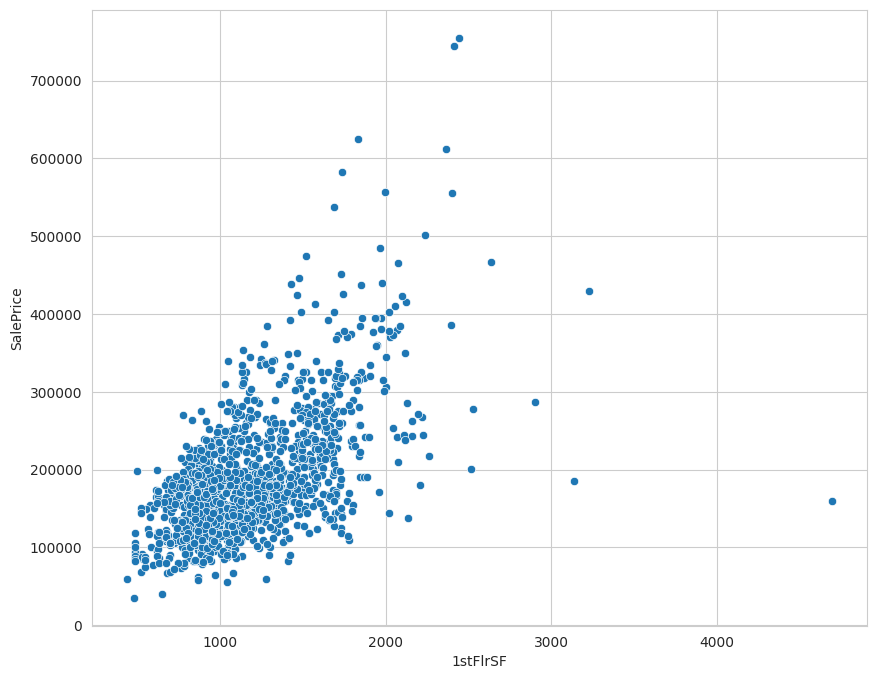

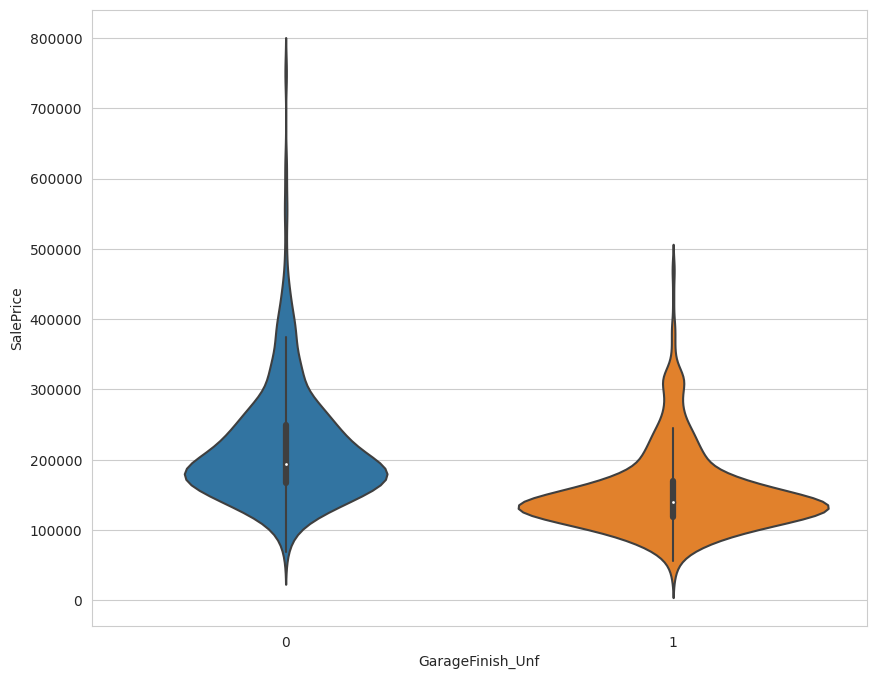

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
"""
This function will create plot for the 10 most correlated variables with 'SalePrice'
"""

def corr_plots_saleprice(df, target_var):
    for col in target_var:
        if col in ['OverallQual', 'KitchenQual_TA', 'GarageFinish_Unf']:
            plt.figure(figsize=(10, 8))
            sns.violinplot(y=df['SalePrice'], x=df_ohe[col])
        else:
            plt.figure(figsize=(10, 8))
            sns.scatterplot(y=df['SalePrice'], x=df_ohe[col])
corr_plots_saleprice(df_ohe, df_ohe_corr_spearman.index.to_list())


---

Now that we have plots to show correlation levels we could generate some reports using the predictive power score library to investigate any potential non linear relationship.

In [17]:
import ppscore as pps
pps.matrix(df=df)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,1stFlrSF,1stFlrSF,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,1stFlrSF,2ndFlrSF,0.000000,regression,True,mean absolute error,354.706697,359.472836,DecisionTreeRegressor()
2,1stFlrSF,BedroomAbvGr,0.000000,regression,True,mean absolute error,0.472658,0.661353,DecisionTreeRegressor()
3,1stFlrSF,BsmtExposure,0.000000,classification,True,weighted F1,0.511800,0.487835,DecisionTreeClassifier()
4,1stFlrSF,BsmtFinSF1,0.000000,regression,True,mean absolute error,367.111675,387.199478,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
571,SalePrice,TotalBsmtSF,0.019962,regression,True,mean absolute error,315.536621,309.237805,DecisionTreeRegressor()
572,SalePrice,WoodDeckSF,0.000000,regression,True,mean absolute error,11.218999,19.241992,DecisionTreeRegressor()
573,SalePrice,YearBuilt,0.134338,regression,True,mean absolute error,24.397389,21.119902,DecisionTreeRegressor()
574,SalePrice,YearRemodAdd,0.124997,regression,True,mean absolute error,17.509065,15.320477,DecisionTreeRegressor()


Let's check these scores in a heat map

<AxesSubplot:xlabel='x', ylabel='y'>

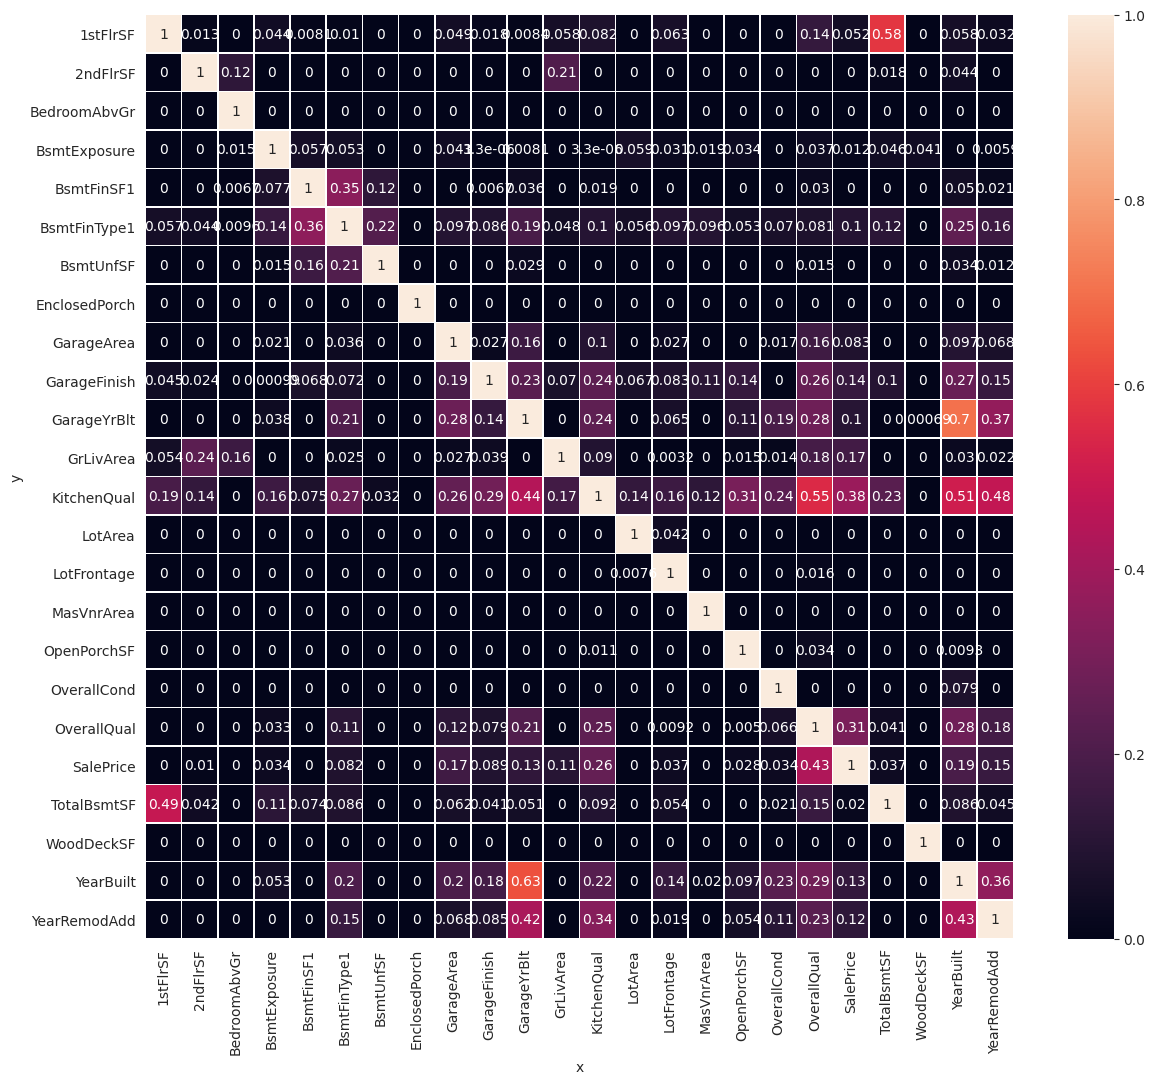

In [18]:
# code taken from the CI lesson on PPS
pps_matrix_raw = pps.matrix(df)
pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')
plt.figure(figsize=(14, 12))
sns.heatmap(data=pps_matrix, linewidths=0.5, annot=True)


As we can see from the heatmap we get some confirmation regarding our previous correlation study.
On the Y axis when we analize 'SalePrice' we notice that the values which have a stronger predictive score are:
* Overall Quality
* Kitchen Quality
* Year Built
* Garage Area
* Year Remodel Add (Year Remodel Date)

Of these only the first two have levels of significant importance for the predictive score (above 0.2). This confirms our initial standard correlation analysis given the fact that after some feature engineer steps two of the most highly correlated variables in the dataset were 'Overall Quality' and 'Kitchen Quality TA' where TA stands for Typical/Average.

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
